# Ước lượng Bayes cho tham số của phân phối Poisson
*Nguyễn Mạnh Linh - KHDL - K4*

## 1. Phân phối của dữ liệu (likelihood)

$X$ là biến ngẫu nhiên chỉ số con sinh ra có phân bố Poisson
$X$ nhận các giá trị cụ thể là $\{X_1, X_2,... ,X_N\}$, trong đó $N$ là số điểm dữ liệu. 

$$
\begin{equation}
\tag{1}
  p( = X_i | \lambda) = \frac{\lambda ^{X_i} e^{-\lambda}}{X_i !}
\end{equation}
$$
Giả thiết các quan sát là độc lập với nhau, khi đó phân bố đồng thời của dữ liệu hay likelihood có dạng như sau:
$$
\begin{equation}
\tag{2}
\begin{split}
  L(\lambda; X) &= \prod_{i=1}^N p(X = X_i | \lambda) \\ 
  &= \prod_{i=1}^N \frac{\lambda ^{X_i} e^{-\lambda}}{X_i!} = e^{-N\lambda} \prod_{i=1}^N \frac{\lambda ^{X_i}}{X_i!} \\
  &=  e^{-N\lambda} \frac{\lambda ^ {\sum_{i=1}^N X_i}}{\prod_{i=1}^N X_i!}
\end{split}
\end{equation}
$$

## 2. Phân phối của hậu nghiệm

### 2.1 Phân phối tiên nghiệm là phân phối đều
Giả thiết phân bố tiên nghiệm là đều, ta cần ước lượng cho phân bố của $\lambda$ là tỉ lệ sinh trung bình với $0 \leq \lambda \leq c$. Ta có hàm mật độ xác suất của $\lambda$:
$$
\tag{3}
f(\lambda) = \frac{\lambda}{c}
$$

Ta có phân bố hậu nghiệm như sau:
$$
\tag{4}
p(\lambda | X) \propto L(\lambda; X) f(\lambda) \propto e^{-N\lambda} \frac{\lambda ^ {1 + \sum_{i=1}^N X_i}}{\prod_{i=1}^N X_i!} \propto Gamma (\alpha, \beta)
$$
Trong đó $\alpha = 2 + \sum_{i=1}^N X_i $ và $\beta = N$

Như vậy hậu nghiệm có phân bố Gamma

### 2.2 Phân phối tiên nghiệm là phân phối Gamma
Với phân bố của tiên nghiệm là phân bố Gamma, hàm mật độ xác suất cho $\lambda$:
$$
\begin{equation}
\tag{5}
f(\lambda; \alpha, \beta) = \frac{\lambda ^ {\alpha - 1} e^{-\beta \lambda} \beta ^ {\alpha}}{\Gamma(\alpha)} 
\end{equation}
$$
cho $\lambda > 0$ với $\alpha > 0$, $\beta > 0$

Ta có phân bố hậu nghiệm như sau:
$$
\begin{equation}
\tag{6}
p(\lambda | X) \propto L(\lambda; X) f(\lambda; \alpha, \beta) \propto e^{-N\lambda} \frac{\lambda ^ {\sum_{i=1}^N X_i}}{\prod_{i=1}^N X_i!} \times \lambda ^ {\alpha - 1} e^{-\beta \lambda} = e^{-(\beta + N)\lambda} \frac{\lambda ^ { -1 + \alpha + \sum_{i=1}^N X_i}}{\prod_{i=1}^N X_i!} \propto Gamma(\alpha', \beta')
\end{equation}
$$
Trong đó $\alpha' = \alpha + \sum_{i=1}^N X_i$ và $\beta' = \beta + N$

## 3. Đặc điểm của các phân phối hậu nghiệm
Như vậy trong cả 2 trường hợp phân phối tiên nghiệm là phân phối đều hay phân phối Gamma thì phân phối hậu nghiệm cũng là phân phối Gamma

## 4. Ước lượng tỉ lệ sinh của 2 nhóm phụ nữ

Đầu tiên ta đọc và lấy ra dữ liệu theo yêu cầu

In [3]:
import pyreadr

In [4]:
result = pyreadr.read_r('../data/gss.rdata')
df = result['gss']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38116 entries, 0 to 38115
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      38116 non-null  int32  
 1   WRKSTAT   38116 non-null  int32  
 2   MARITAL   38116 non-null  int32  
 3   AGEWED    25581 non-null  object 
 4   CHILDS    37982 non-null  object 
 5   AGE       37981 non-null  object 
 6   EDUC      37998 non-null  object 
 7   PAEDUC    27401 non-null  object 
 8   MAEDUC    31783 non-null  object 
 9   DEGREE    37979 non-null  object 
 10  PADEG     29531 non-null  object 
 11  MADEG     33677 non-null  object 
 12  FEMALE    38116 non-null  float64
 13  RACE      38116 non-null  int32  
 14  INCOME    33147 non-null  object 
 15  INCOME98  2503 non-null   object 
 16  RELIG     38116 non-null  int32  
 17  FUND      36852 non-null  float64
 18  ATTEND    37724 non-null  object 
 19  RELITEN   33699 non-null  float64
 20  PRAY      15103 non-null  fl

In [5]:
import pandas as pd

Dữ liệu được lọc cho phụ nữ ở độ tuổi 40 trong thập niên 1990 (YEAR>=1990 & AGE==40 & FEMALE==1)

In [6]:
df_fil = df[(df['YEAR'] >= 1990) & (df['AGE'] == 40) & (df['FEMALE'] == 1)]

Hai nhóm phụ nữ được nghiên cứu là nhóm có trình độ văn hóa trên phổ thông (DEG >= 3) gọi là `df1` và nhóm còn lại gọi là `df2`. Do chỉ quan tâm đến số con sinh ra nên ta lấy luôn cột `CHILD`

In [7]:
df1_index = df_fil[df_fil['DEGREE'] >= 3].index

df1 = df_fil[df_fil.index.isin(df1_index)]
df2 = df_fil[~df_fil.index.isin(df1_index)]

df1 = df1['CHILDS']
df2 = df2['CHILDS']

Tập đầu tiên có 44 bản ghi

In [8]:
df1.info()

<class 'pandas.core.series.Series'>
Index: 44 entries, 25713 to 38066
Series name: CHILDS
Non-Null Count  Dtype 
--------------  ----- 
44 non-null     object
dtypes: object(1)
memory usage: 704.0+ bytes


Tập thứ 2 có 112 bản ghi

In [9]:
df2.info()

<class 'pandas.core.series.Series'>
Index: 112 entries, 25116 to 38112
Series name: CHILDS
Non-Null Count  Dtype 
--------------  ----- 
112 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


Ta cần ước lượng tỉ lệ sinh cho từng tập bằng phương pháp Bayes. Trước hết ta có thể lấy ra số lượng con nhỏ nhất, lớn nhất và trung bình trong mỗi tập

In [10]:
min1 = df1.min()
max1 = df1.max()
mean1 = df1.mean()

min2 = df2.min()
max2 = df2.max()
mean2 = df2.mean()

print(f'Set 1 | min: {min1}, max: {max1}, mean: {mean1}')
print(f'Set 2 | min: {min2}, max: {max2}, mean: {mean2}')

Set 1 | min: 0, max: 4, mean: 1.5
Set 2 | min: 0, max: 6, mean: 1.9375


Để ước lượng trung bình cho từng tập bằng phương pháp Bayes, ta dử dụng thư viện PyMC, làm lần lượt cho từng tập.

In [11]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Trước hết ta định nghĩa mô hình với giả sử tiên nghiệm có phân bố đều trong khoảng từ 0 đến 10

In [12]:
# Khai báo một mô hình
model1 = pm.Model()

with model1:
  # Tiên nghiệm
  lambda1 = pm.Uniform(name='lambda1', lower=0, upper=10)
  
  # likelihood
  y_obs1 = pm.Poisson(name='y_obs1', mu=lambda1, observed=df1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda1]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


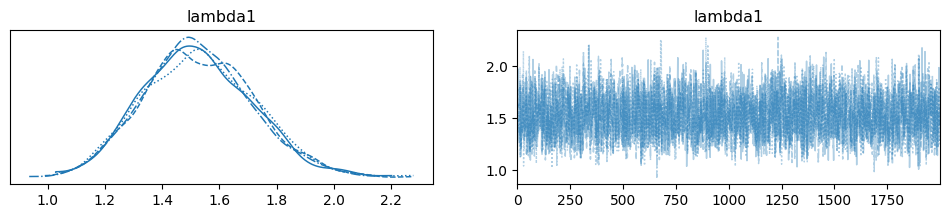

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 2000)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    lambda1  (chain, draw) float64 1.857 1.79 1.641 1.975 ... 1.433 1.606 1.553
Attributes:
    created_at:                 2023-07-29T10:38:08.779379
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.6.1
    sampling_time:              0.7316384315490723
    tuning_steps:               1000
<xarray.DataArray 'lambda1' ()>
array(1.52333479)
Coordinates:
    chain    int64 0
<xarray.DataArray 'lambda1' ()>
array(1.52333479)
Coordinates:
    chain    int64 0
<xarray.DataArray 'lambda1' ()>
array(1.52333479)
Coordinates:
    chain    int64 0
<xarray.DataArray 'lambda1' ()>
array(1.52333479)
Coordinates:
    chain    int64 0


In [13]:
import matplotlib.pyplot as plt

with model1:
    # Lấy 2000 tiên nghiệm, bỏ qua 1000 vòng lặp đầu tiên và thực hiện 4 lần
    trace1 = pm.sample(2000, chains = 4, tune = 1000)
    pm.plot_trace(trace1)
    plt.show()

    print(trace1.posterior)

    for i in range(4):
        print(trace1.posterior['lambda1'][0].mean())

In [14]:
# Khai báo một mô hình
model2 = pm.Model()

with model2:
  # Tiên nghiệm
  lambda2 = pm.Uniform(name='lambda2', lower=0, upper=10)
  
  # likelihood
  y_obs2 = pm.Poisson(name='y_obs2', mu=lambda2, observed=df2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda2]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


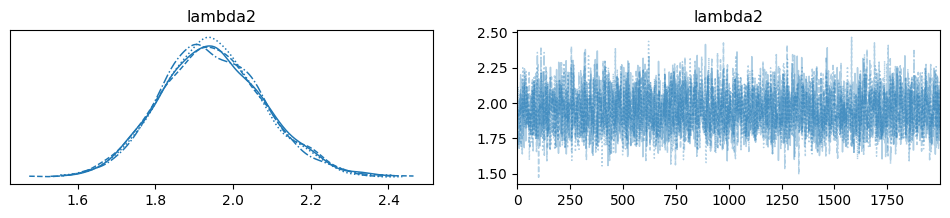

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 2000)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    lambda2  (chain, draw) float64 1.642 1.881 1.928 1.928 ... 1.842 1.847 1.862
Attributes:
    created_at:                 2023-07-29T10:38:12.407004
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.6.1
    sampling_time:              0.7004516124725342
    tuning_steps:               1000
<xarray.DataArray 'lambda2' ()>
array(1.94941544)
Coordinates:
    chain    int64 0
<xarray.DataArray 'lambda2' ()>
array(1.94941544)
Coordinates:
    chain    int64 0
<xarray.DataArray 'lambda2' ()>
array(1.94941544)
Coordinates:
    chain    int64 0
<xarray.DataArray 'lambda2' ()>
array(1.94941544)
Coordinates:
    chain    int64 0


In [15]:
import matplotlib.pyplot as plt

with model2:
    # Lấy 2000 tiên nghiệm, bỏ qua 1000 vòng lặp đầu tiên và thực hiện 4 lần
    trace2 = pm.sample(2000, chains = 4, tune = 1000)
    pm.plot_trace(trace2)
    plt.show()

    print(trace2.posterior)

    for i in range(4):
        print(trace2.posterior['lambda2'][0].mean())

Hai biểu đồ trên thể hiện phân bố của tỉ lệ sinh của 2 nhóm phụ nữ. Ta có thể ước lượng con số trung bình tỉ lệ sinh cho mỗi nhóm bằng cách lấy trung bình của mỗi phân phối. Tỉ lệ sinh trung bình lần lượt cho mỗi nhóm lần lượt là $\lambda_1 \approx 1.527$ và $\lambda_2 \approx 1.947$

## 5. So sánh tỉ lệ sinh giữa 2 nhóm
Trong phần này, chúng ta sẽ cùng so sánh tỉ lệ sinh giữa 2 nhóm phụ nữ. Đây là bài toán kiểm định giả thiết so sánh 2 trung bình. Ở phần trước, 1 cách trực quan ta thấy rằng $\lambda_2 > \lambda_1$ và chúng ta sẽ kiểm chứng xem điều này có đúng hay không với một mức ý nghĩa nhất định. Ta có bài toán kiểm định giả thiết sau:
$$
\begin{equation}
\begin{split}
H_0 &: \lambda_1 = \lambda_2; \\ 
H_1 &: \lambda_1 < \lambda_2
\end{split}
\end{equation}
$$
Với số lượng quan sát lớn hơn 30 (40 cho nhóm 1 và 112 cho nhóm 2), ta có thể giả sử phân bố của $\lambda_1$ và $\lambda_2$ xấp xỉ phân bố chuẩn (ở phần trước ta đã chứng minh $\lambda_1$ và $\lambda_2$ có phân bố Gamma nếu như phân bố tiên nghiệm là đều), cũng có thể dùng T-test để kiểm định thống kê với thư viện SciPy.

In [16]:
lambda1_arr = pd.DataFrame(trace1.posterior['lambda1'][0])
lambda2_arr = pd.DataFrame(trace2.posterior['lambda2'][0])

In [17]:
lambda1_arr.describe()

,0
count,2000.000000
mean,1.523335
std,0.189871
min,1.028710
25%,1.388586
50%,1.513670
75%,1.654620
max,2.202317


In [18]:
lambda2_arr.describe()

,0
count,2000.000000
mean,1.949415
std,0.134907
min,1.557635
25%,1.854458
50%,1.944256
75%,2.038453
max,2.414852


In [22]:
import scipy.stats as stats

In [31]:
result = stats.ttest_ind(a=lambda1_arr, b=lambda2_arr, equal_var=False, alternative='less')

In [32]:
print(result)

Ttest_indResult(statistic=array([-81.80957542]), pvalue=array([0.]))


Giá trị p-value là rất nhỏ, như vậy với mức ý nghĩa $5\%$ ta có thể bác bỏ giả thiết $H_0$ và chấp nhận giả thiết $H_1$, hay nói cách khác tỉ lệ sinh của nhóm phụ nữ có trình độ văn hóa trên phổ thông là thấp hơn so với nhóm còn lại với mức ý nghĩa $5\%$